In [62]:
import pandas as pd

%matplotlib inline

In [2]:
trainset = pd.read_csv("data/train.csv", low_memory=False)

In [3]:
trainset.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [11]:
trainset["gender"] = trainset.SexuponOutcome.apply(lambda x: str(x).split()[1] if len(str(x).split()) > 1 else x )

In [16]:
trainset.AgeuponOutcome.apply(lambda x: str(x).split()[1] if len(str(x).split()) > 1 else x ).value_counts().index

Index([u'years', u'months', u'year', u'weeks', u'month', u'days', u'week',
       u'day'],
      dtype='object')

In [23]:
day_map = {"year": 365, "years": 365, "months":30, 'weeks': 7, 'month':30, 'days':1, 'week':7, 'day':1, 'nan': 0}

In [25]:
days_suffix_conversion = trainset.AgeuponOutcome.apply(lambda x: str(x).split()[1] if len(str(x).split()) > 1 else x ).apply(lambda x: day_map[str(x)])

In [37]:
days_prefix = trainset.AgeuponOutcome.apply(lambda x: str(x).split()[0]).replace('nan', '0').apply(lambda x: int(x))

In [38]:
trainset["AgeinDays"] = days_prefix * days_suffix_conversion

In [43]:
trainset.SexuponOutcome.apply(lambda x: str(x).split()[0]).value_counts()

Neutered    9779
Spayed      8820
Intact      7036
Unknown     1093
nan            1
Name: SexuponOutcome, dtype: int64

In [45]:
trainset["Spayed"] = trainset.SexuponOutcome.apply(lambda x: 1 if str(x).split()[0] in ["Neutered", "Spayed"] else 0 )

In [46]:
trainset.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,gender,AgeinDays,Spayed
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,Male,365,1
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,Female,365,1
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,Male,730,1
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,Male,21,0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,Male,730,1


In [58]:
trainset[trainset.OutcomeType == "Adoption"].groupby(["AnimalType"])["AgeinDays"].mean()

AnimalType
Cat    422.145365
Dog    715.789595
Name: AgeinDays, dtype: float64

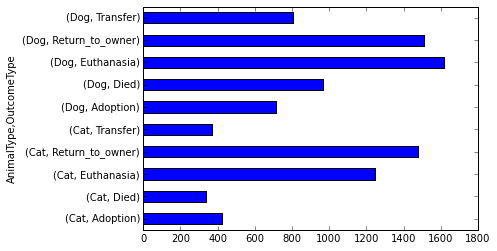

In [66]:
trainset.groupby(["AnimalType","OutcomeType"])["AgeinDays"].mean().plot(kind="barh")

In [70]:
# breed type
trainset["MixBreed"] = trainset.Breed.apply(lambda x: 1 if str(x).split()[-1] == "Mix" else 0)

In [72]:
trainset["BreedHashed"] = trainset.Breed.apply(lambda x: hash(x))

In [99]:
# NaN 7691
trainset["named"] = trainset.Name.apply(lambda x: 0 if pd.isnull(x) else 1)

In [100]:
trainset.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,gender,AgeinDays,Spayed,MixBreed,BreedHashed,named
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,Male,365,1,1,5926437783150898133,1
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,Female,365,1,1,-2451214413280860830,1
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,Male,730,1,1,6838356946883688032,1
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,Male,21,0,1,-2451214413280860830,0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,Male,730,1,0,3739560957369682269,0


In [105]:
trainset.DateTime = pd.to_datetime(trainset.DateTime, infer_datetime_format=True)

In [116]:
trainset["Year"] = trainset.DateTime.apply(lambda x: x.year)
trainset["Month"] = trainset.DateTime.apply(lambda x: x.month)
trainset["Day"] = trainset.DateTime.apply(lambda x: x.day)

In [117]:
trainset.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,gender,AgeinDays,Spayed,MixBreed,BreedHashed,named,Year,Month,Day
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,Male,365,1,1,5926437783150898133,1,2014,2,12
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,Female,365,1,1,-2451214413280860830,1,2013,10,13
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,Male,730,1,1,6838356946883688032,1,2015,1,31
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,Male,21,0,1,-2451214413280860830,0,2014,7,11
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,Male,730,1,0,3739560957369682269,0,2013,11,15


In [120]:
trainset["IsAdult"] = trainset.AgeinDays.apply(lambda x: 1 if x > 365 else 0)

In [153]:
trainset.to_csv("processed_trainset.csv", index=False)

In [128]:
trainset["color_1"] = trainset.Color.apply(lambda x: x.split("/")[0]).apply(lambda x: hash(x))

In [129]:
trainset["color_2"] = trainset.Color.apply(lambda x: x.split("/")[1] if len(x.split("/")) > 1 else pd.np.nan).apply(lambda x: hash(x))

In [130]:
trainset

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,...,Spayed,MixBreed,BreedHashed,named,Year,Month,Day,IsAdult,color_1,color_2
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,...,1,1,5926437783150898133,1,2014,2,12,0,4105077644112998433,-1569537633132385766
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,...,1,1,-2451214413280860830,1,2013,10,13,0,6438380460485459203,0
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,...,1,1,6838356946883688032,1,2015,1,31,1,-2499956492446219776,-1569537633132385766
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,...,0,1,-2451214413280860830,0,2014,7,11,0,-8953416687658936876,0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,...,1,0,3739560957369682269,0,2013,11,15,1,-2354942681955301254,0


In [133]:
trainset["Hour"] = trainset.DateTime.apply(lambda x: x.hour)

In [134]:
trainset["AnimalTypeBinary"] = trainset.AnimalType.apply(lambda x: 0 if x == "Dog" else 1)

In [139]:
trainset["SubtypeHash"] = trainset.OutcomeSubtype.apply(lambda x: hash(x))

In [141]:
trainset.gender.value_counts(dropna=False)

Male       13304
Female     12331
Unknown     1093
NaN            1
Name: gender, dtype: int64

In [149]:
gender_bin = {"Male": 0, "Female": 1, "Unknown": 2 }

In [152]:
trainset["GenderNumeric"] = trainset.gender.apply(lambda x: gender_bin[x] if not pd.isnull(x) else 3)

In [167]:
train_columns = "AgeinDays Spayed MixBreed BreedHashed named Year Month Day IsAdult color_1 color_2 Hour AnimalTypeBinary SubtypeHash GenderNumeric".split()

In [168]:
trainset[train_columns].head()

,AgeinDays,Spayed,MixBreed,BreedHashed,named,Year,Month,Day,IsAdult,color_1,color_2,Hour,AnimalTypeBinary,SubtypeHash,GenderNumeric
0,365,1,1,5926437783150898133,1,2014,2,12,0,4105077644112998433,-1569537633132385766,18,0,0,0
1,365,1,1,-2451214413280860830,1,2013,10,13,0,6438380460485459203,0,12,1,-1752246522822996174,1
2,730,1,1,6838356946883688032,1,2015,1,31,1,-2499956492446219776,-1569537633132385766,12,0,8616583512245740691,0
3,21,0,1,-2451214413280860830,0,2014,7,11,0,-8953416687658936876,0,19,1,6471596336433412217,0
4,730,1,0,3739560957369682269,0,2013,11,15,1,-2354942681955301254,0,12,0,6471596336433412217,0


In [159]:
trainset.OutcomeType.value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [160]:
outcome_type_map = {"Adoption": 1, "Transfer": 2, "Return_to_owner": 3, "Euthanasia": 4, "Died": 5}

In [162]:
trainset["OutcomeTypeBin"] = trainset.OutcomeType.apply(lambda x: outcome_type_map[x])

In [165]:
final_trainset = trainset[train_columns]

In [171]:
train = trainset[train_columns]
prediction = trainset["OutcomeTypeBin"]

In [172]:
import xgboost as xgb

In [173]:
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(train.as_matrix(), prediction.as_matrix())

In [ ]:
gbm